# Image Classification with Deep Neural Networks (Cats vs. Non-Cats)
A clean, reproducible re-run of my deep learning image classifier.  
The notebook loads a small dataset, standardizes images, trains both a 2-layer and an L-layer network, evaluates performance, and tests on a custom image.

In [28]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import sys
from dnn_app_utils_v3 import *
from public_tests import *


%matplotlib inline

plt.rcParams['figure.figsize'] = (5.0, 4.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1) Load and Process the Dataset

In [47]:
import glob
print(glob.glob("**/L_layer_model_test.py", recursive=True))


[]


In [30]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. It's a cat picture.
Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


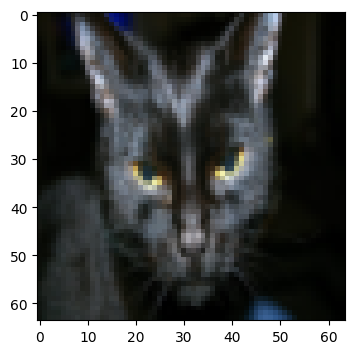

In [31]:
# Example of a picture
index = 25
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

m_train = train_x_orig.shape[0]
m_test = test_x_orig.shape[0]
num_px = train_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))


## 2) Preprocessing (Flatten + Standardize)


In [32]:
# Reshape the training and test examples
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

print ("train_x_flatten shape: " + str(train_x_flatten.shape))
print ("test_x_flatten shape: " + str(test_x_flatten.shape))
print ("sanity check after reshaping: " + str(train_x_flatten[0:5,0]))

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x_flatten shape: (12288, 209)
test_x_flatten shape: (12288, 50)
sanity check after reshaping: [17 31 56 22 33]
train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [33]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.

    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- if True, print the cost every 100 iterations

    Returns:
    parameters -- a dictionary containing W1, b1, W2, b2
    """
    np.random.seed(1)
    grads = {}
    costs = []                             
    (n_x, n_h, n_y) = layers_dims
    
    parameters = initialize_parameters(n_x, n_h, n_y)

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):

        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
        
        cost = compute_cost(A2, Y)

        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    return parameters, costs


## 3) Architecture Overview
We’ll compare a 2-layer NN vs. an L-layer deep NN, then train the L-layer model.



In [34]:
n_x = train_x.shape[0]
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

parameters, costs = two_layer_model(train_x, train_y, layers_dims = layers_dims, num_iterations = 2500, print_cost=True)


Cost after iteration 0: 0.693050
Cost after iteration 100: 0.646432
Cost after iteration 200: 0.632514
Cost after iteration 300: 0.601502
Cost after iteration 400: 0.560197
Cost after iteration 500: 0.515830
Cost after iteration 600: 0.475490
Cost after iteration 700: 0.433916
Cost after iteration 800: 0.400798
Cost after iteration 900: 0.358071
Cost after iteration 1000: 0.339428
Cost after iteration 1100: 0.305275
Cost after iteration 1200: 0.274914
Cost after iteration 1300: 0.246818
Cost after iteration 1400: 0.198507
Cost after iteration 1500: 0.174483
Cost after iteration 1600: 0.170808
Cost after iteration 1700: 0.113065
Cost after iteration 1800: 0.096294
Cost after iteration 1900: 0.083426
Cost after iteration 2000: 0.074391
Cost after iteration 2100: 0.066307
Cost after iteration 2200: 0.059193
Cost after iteration 2300: 0.053361
Cost after iteration 2400: 0.048555


In [37]:
pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.9999999999999998
Accuracy: 0.72


## 4) Deep L-Layer Network
Define and test the deeper model utilities.


In [38]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.

    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    layers_dims -- list containing input size and each layer size, of length (number of layers + 1).
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate
    print_cost -- if True, it prints the cost every 100 steps

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X, parameters)
        
        cost = compute_cost(AL, Y)
    
        grads = L_model_backward(AL, Y, caches)
        
        parameters = update_parameters(parameters, grads, learning_rate)
                
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    return parameters, costs


In [49]:
layers_dims = [12288, 20, 7, 5, 1]

In [50]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations=1, print_cost=True)

print("Model trained successfully for 1 iteration.")

Cost after iteration 0: 0.771749
Model trained successfully for 1 iteration.


## 5) Train the Deep Model


In [51]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


## 6) Evaluation

In [52]:
pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.9856459330143539
Accuracy: 0.8


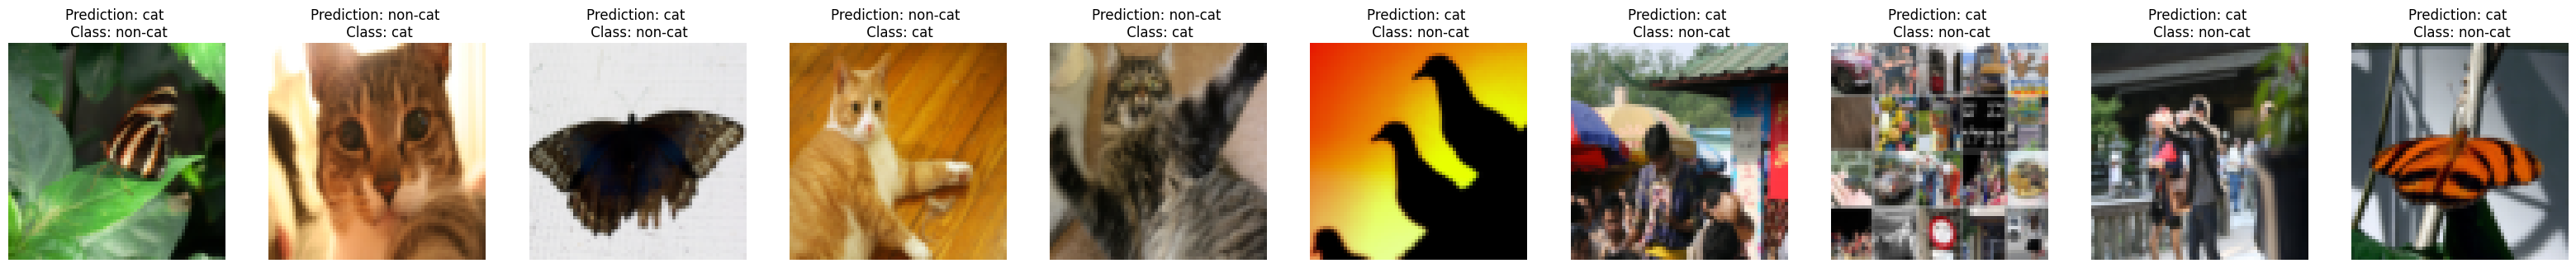

In [53]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

In [75]:
def predict(X, y, parameters):
    m = X.shape[1]
    p = np.zeros((1,m))
    
    probas, caches = L_model_forward(X, parameters)
    
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 0
        else:
            p[0,i] = 1

    print("Accuracy: "  + str(np.sum((p == y)/m)))

    return p


## 7) Inference on a Custom Image


Accuracy: 0.0
Accuracy: 0.0
y = 0.0, your L-layer model predicts a "non-cat" picture.


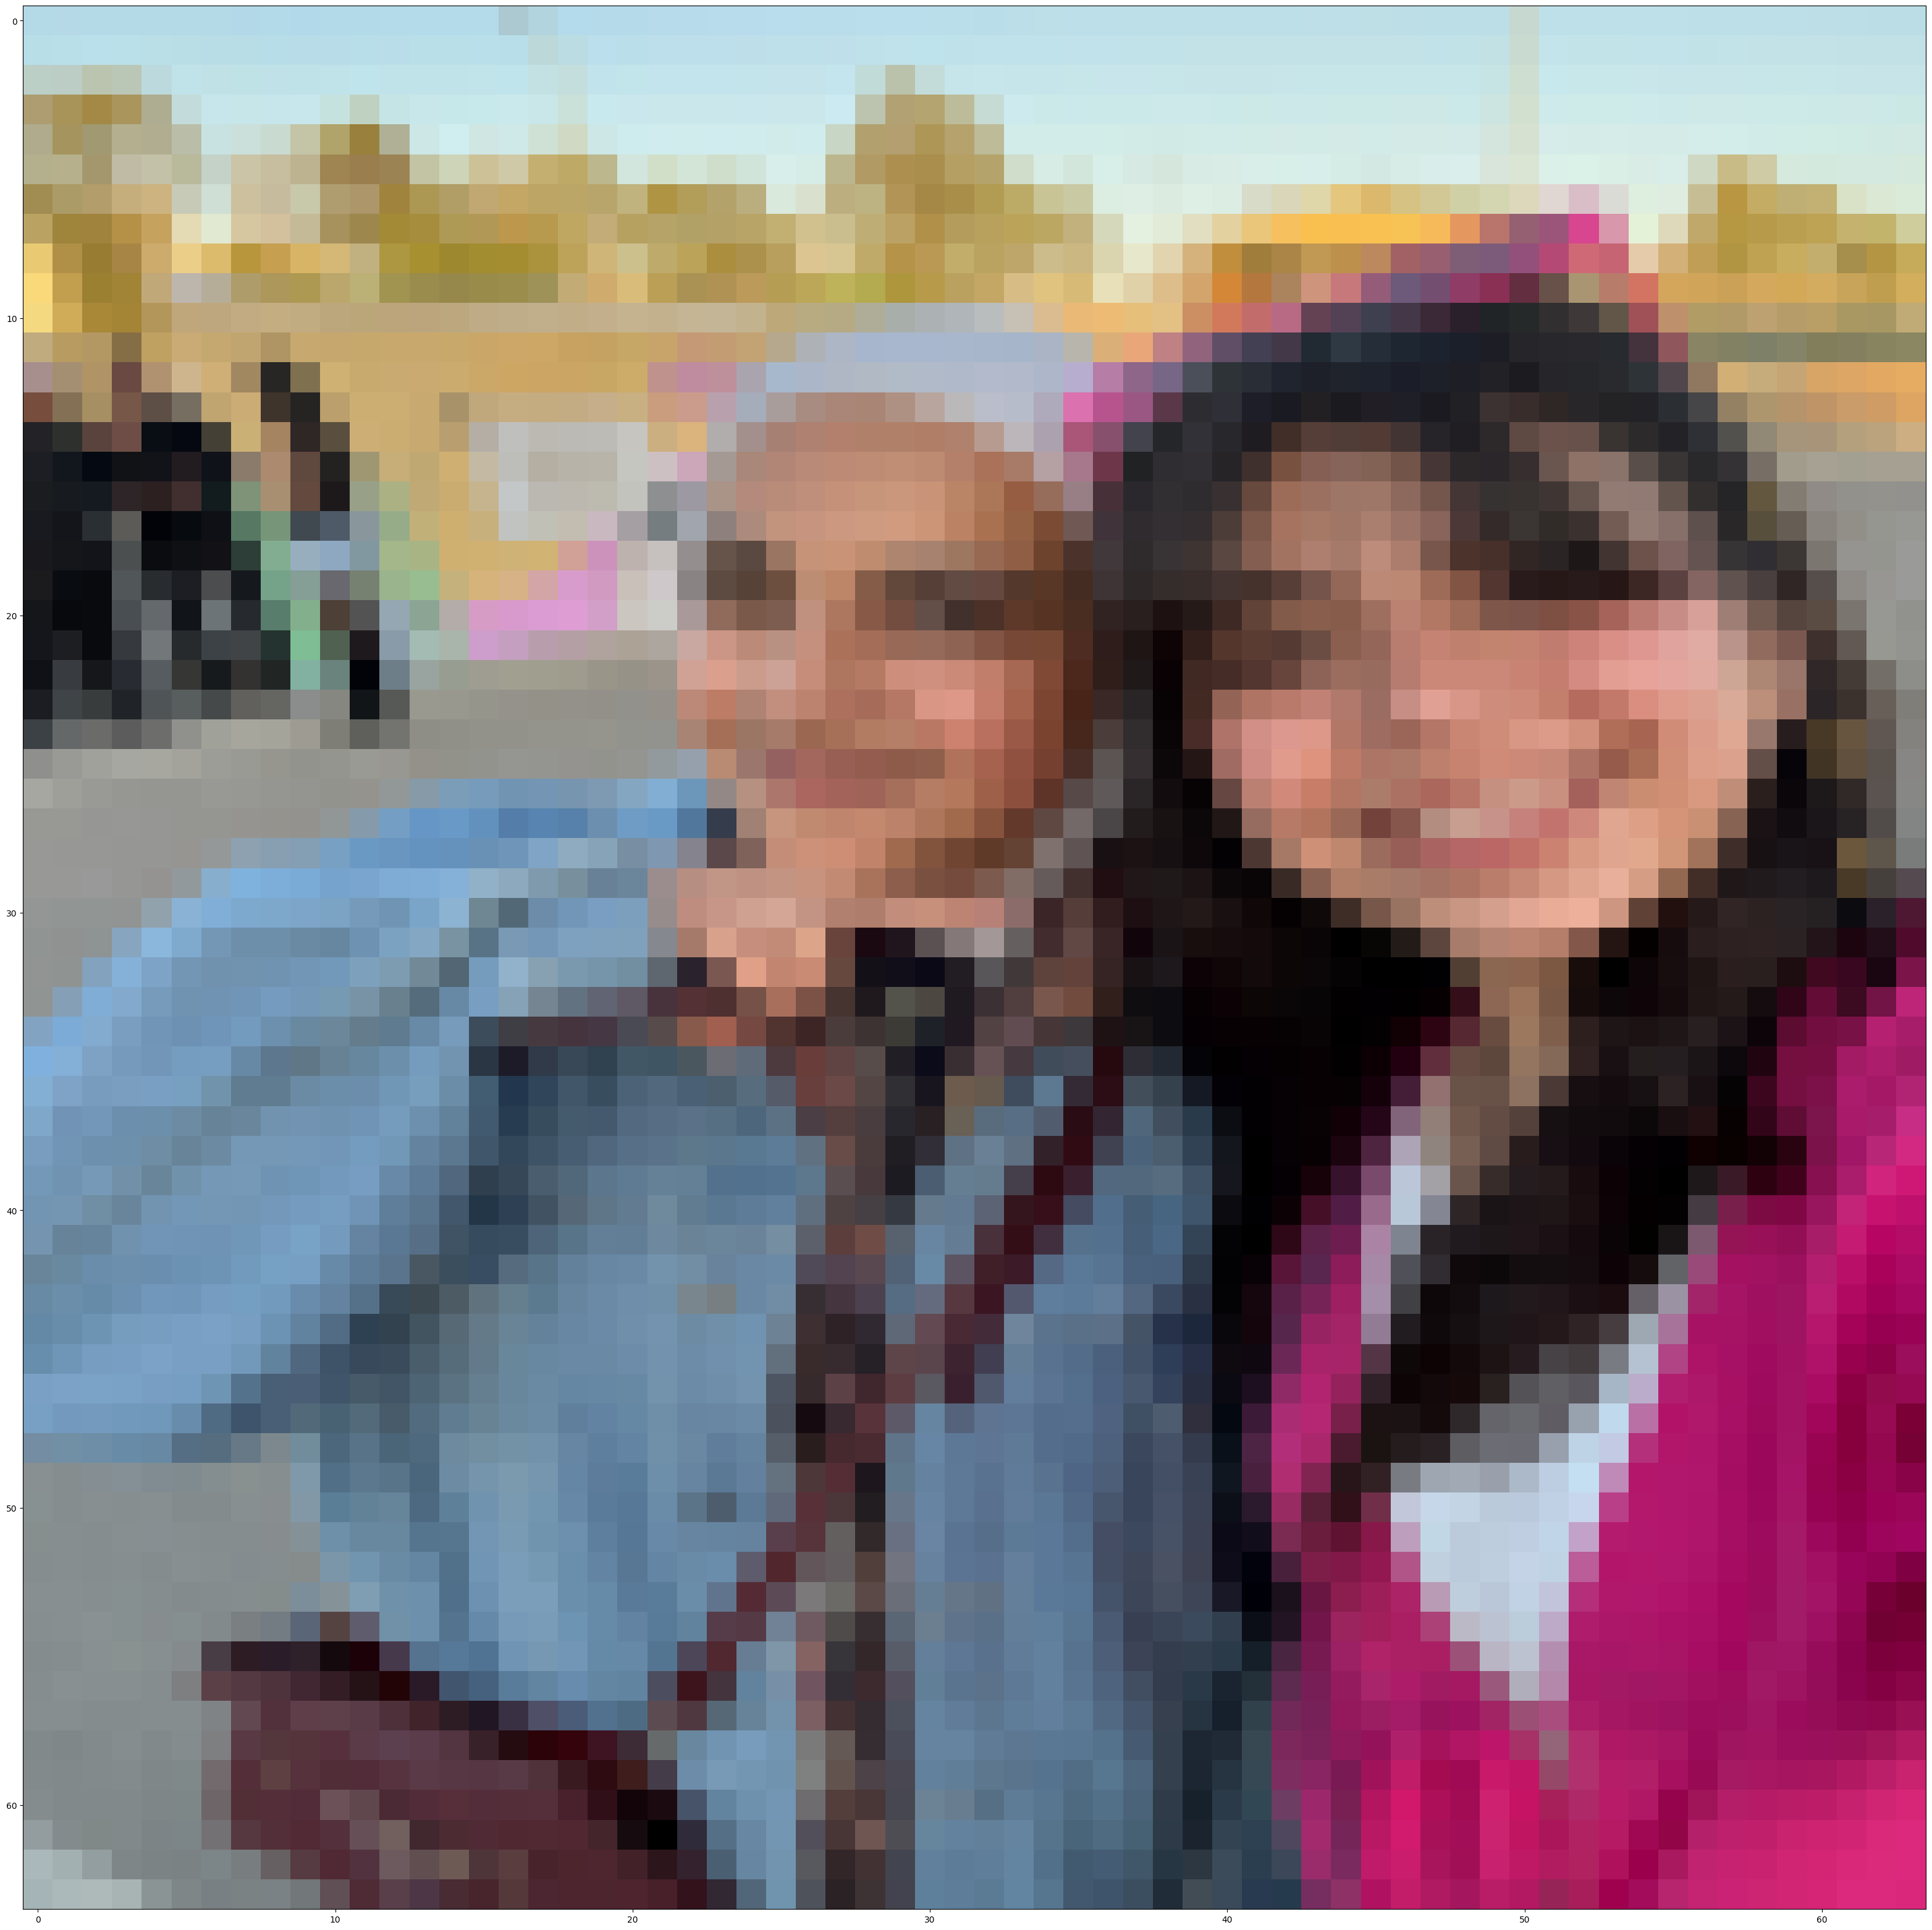

In [76]:
my_image = "yararaghad.jpg"
my_label_y = [1]

image = np.array(Image.open(my_image).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

print ("y = " + str(np.squeeze(predict(image, my_label_y, parameters))) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(predict(image, my_label_y, parameters))),].decode("utf-8") +  "\" picture.")

In [63]:
# RE-TRAIN the final model before testing a custom image
layers_dims = [12288, 20, 7, 5, 1]
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations=2500, print_cost=True)


Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


In [64]:
AL, _ = L_model_forward(image, parameters)
print("P(cat) =", float(AL[0,0]))


P(cat) = 0.9504151448986471


In [65]:
p = (AL > 0.7).astype(int)  # require 70% confidence for "cat"


In [66]:
# Ensure class order is what you think
print([c.decode() for c in classes])  # should print ['non-cat', 'cat']

# Verify shape of the test image going into the net
print(image.shape)  # -> (12288, 1)


['non-cat', 'cat']
(12288, 1)
